<a href="https://colab.research.google.com/github/harshrajyaguru/oasis-tasks-repo/blob/main/Project-1%20%7C%20Level%20-%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("dgomonov/new-york-city-airbnb-open-data")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'new-york-city-airbnb-open-data' dataset.
Path to dataset files: /kaggle/input/new-york-city-airbnb-open-data


In [2]:
import pandas as pd

df = pd.read_csv(path + "/AB_NYC_2019.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


# Task
Clean the dataframe `df`.

## Handle missing values

### Subtask:
Inspect the dataset for missing values and decide on a strategy to handle them (e.g., imputation, removal).


**Reasoning**:
Inspect the dataframe for missing values in each column and print the results to understand the extent of missingness.



In [3]:
print(df.isnull().sum())

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


**Reasoning**:
Based on the missing value counts, the columns 'last_review' and 'reviews_per_month' have a large number of missing values (over 10000). These missing values likely indicate that there have been no reviews for these listings. The 'name' and 'host_name' columns have a small number of missing values (less than 30). For 'last_review' and 'reviews_per_month', imputing with 0 seems appropriate as it signifies no reviews. For 'name' and 'host_name', dropping the rows with missing values is a reasonable approach due to the small number of missing values and the nature of the data.



In [4]:
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)
df['last_review'] = df['last_review'].fillna('No reviews')
df.dropna(subset=['name', 'host_name'], inplace=True)
print(df.isnull().sum())

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64


## Handle duplicate values

### Subtask:
Check for and remove any duplicate rows.


**Reasoning**:
Check for duplicate rows in the DataFrame and remove them if found, then verify the removal.



In [5]:
print("Number of duplicate rows before dropping:", df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("Number of duplicate rows after dropping:", df.duplicated().sum())

Number of duplicate rows before dropping: 0
Number of duplicate rows after dropping: 0


## Handle outliers

### Subtask:
Identify and address potential outliers in numerical columns.


**Reasoning**:
Select numerical columns and calculate descriptive statistics to understand their distribution and identify potential outliers.



In [6]:
numerical_cols = df.select_dtypes(include=['number']).columns
display(df[numerical_cols].describe())

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.885800e+04,4.885800e+04,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000
mean,1.902335e+07,6.763169e+07,40.728941,-73.952170,152.740309,7.012444,23.273098,1.091124,7.148369,112.801425
std,1.098289e+07,7.862389e+07,0.054528,0.046159,240.232386,20.019757,44.549898,1.597270,32.964600,131.610962
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.475980e+06,7.818669e+06,40.690090,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.969114e+07,3.079133e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915765e+07,1.074344e+08,40.763107,-73.936280,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


**Reasoning**:
Visualize the distribution of numerical columns using box plots to identify potential outliers visually.



IndexError: index 9 is out of bounds for axis 0 with size 9

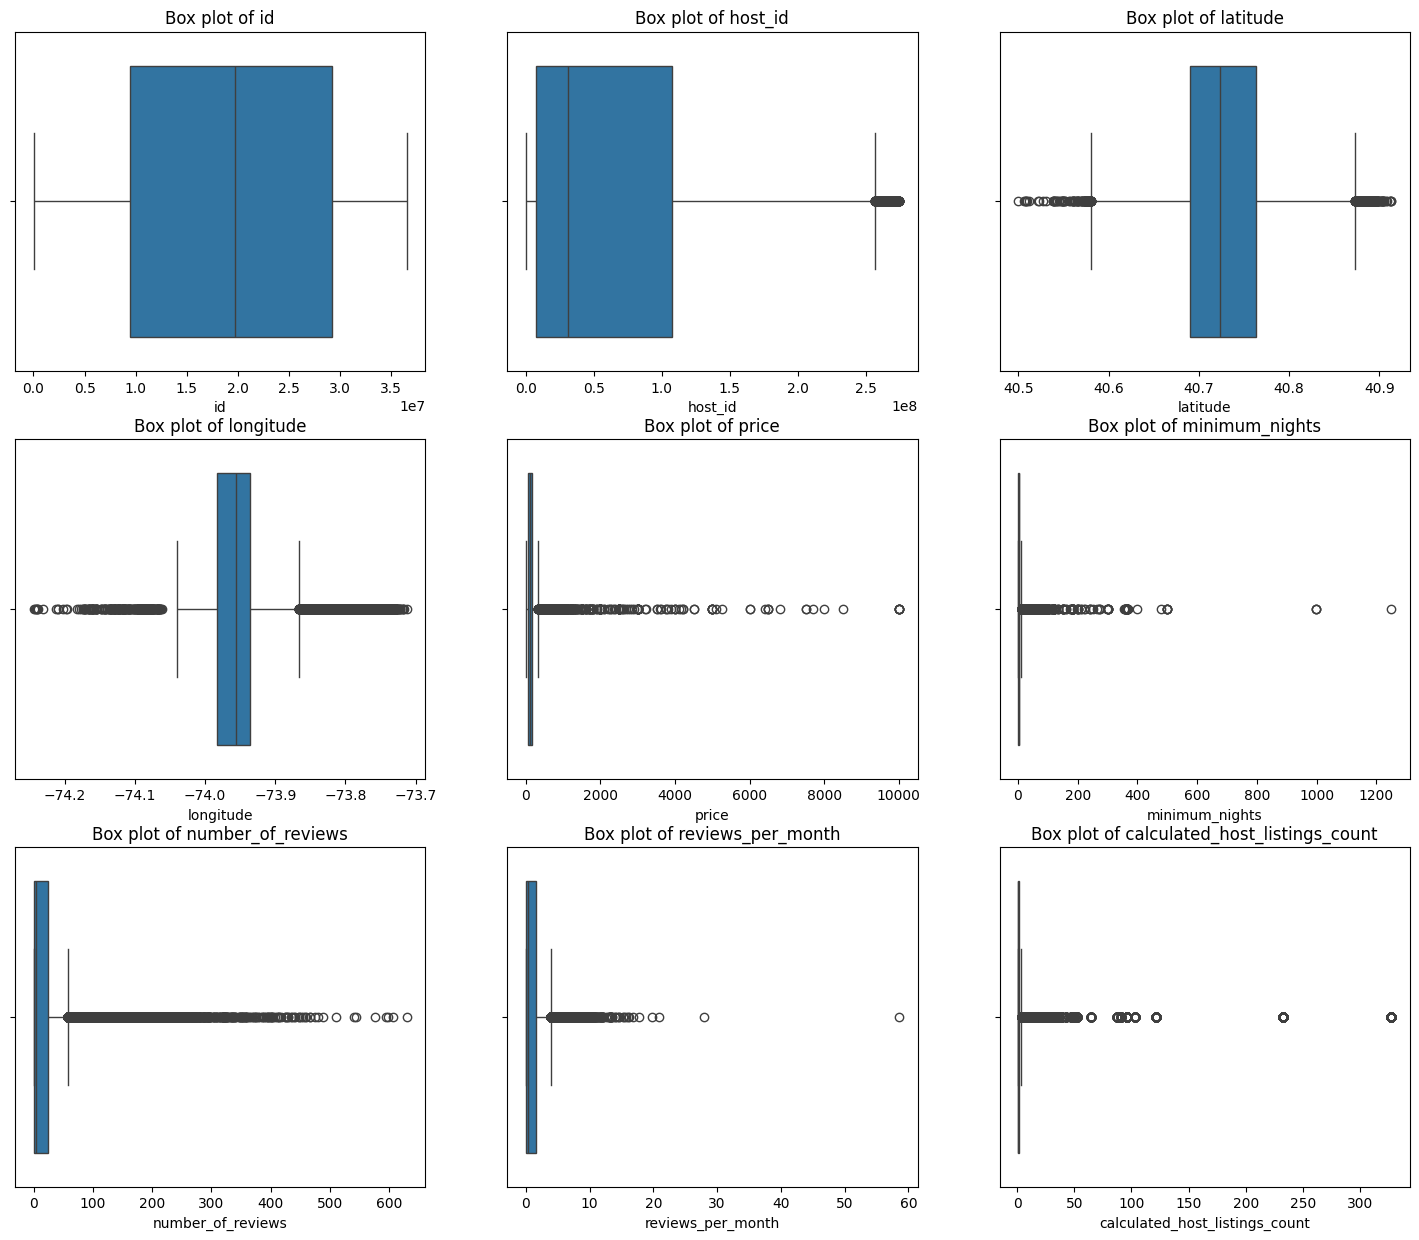

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 15))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Box plot of {col}')
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()

**Reasoning**:
The previous code failed because the number of subplots (9) is less than the number of numerical columns (10). Adjust the number of subplots to match the number of numerical columns and regenerate the box plots.



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = df.select_dtypes(include=['number']).columns
n_cols = len(numerical_cols)
n_rows = (n_cols + 2) // 3  # Calculate number of rows needed

fig, axes = plt.subplots(nrows=n_rows, ncols=3, figsize=(18, n_rows * 5))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Box plot of {col}')
    axes[i].set_xlabel(col)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**Reasoning**:
Based on the descriptive statistics and box plots, 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', and 'calculated_host_listings_count' show clear outliers. Implement a strategy to cap or remove these outliers to improve the data quality for analysis. For 'price' and 'minimum_nights', cap the values at a reasonable upper bound. For 'number_of_reviews', 'reviews_per_month', and 'calculated_host_listings_count', capping might also be appropriate or further investigation is needed. Given the scope, capping seems a reasonable initial approach for these as well. The 'id', 'host_id', 'latitude', and 'longitude' columns are less likely to have meaningful outliers in the same sense, and 'availability_365' is a count within a fixed range, so they don't require outlier handling in this step.



In [ ]:
# Cap 'price' at the 99th percentile
price_cap = df['price'].quantile(0.99)
df['price'] = df['price'].clip(upper=price_cap)

# Cap 'minimum_nights' at a reasonable value, e.g., 365 (a year)
df['minimum_nights'] = df['minimum_nights'].clip(upper=365)

# Cap 'number_of_reviews' at the 99th percentile
reviews_cap = df['number_of_reviews'].quantile(0.99)
df['number_of_reviews'] = df['number_of_reviews'].clip(upper=reviews_cap)

# Cap 'reviews_per_month' at the 99th percentile
reviews_per_month_cap = df['reviews_per_month'].quantile(0.99)
df['reviews_per_month'] = df['reviews_per_month'].clip(upper=reviews_per_month_cap)

# Cap 'calculated_host_listings_count' at the 99th percentile
listings_count_cap = df['calculated_host_listings_count'].quantile(0.99)
df['calculated_host_listings_count'] = df['calculated_host_listings_count'].clip(upper=listings_count_cap)

# Re-check descriptive statistics to see the impact of capping
display(df[numerical_cols].describe())

## Correct data types

### Subtask:
Ensure columns have appropriate data types.


**Reasoning**:
Display the current data types of all columns in the DataFrame to identify columns that might require data type correction, and then convert the 'last_review' column to datetime objects. Finally, display the data types again to confirm the changes.



In [ ]:
print("Data types before conversion:")
print(df.dtypes)

# Convert 'last_review' to datetime objects
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

print("\nData types after conversion:")
print(df.dtypes)

## Address inconsistencies

### Subtask:
Look for inconsistencies in categorical data (e.g., variations in spelling).


**Reasoning**:
Identify categorical columns and print their unique values and counts to check for inconsistencies.



In [ ]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    print(f"Column: {col}")
    print(df[col].value_counts())
    print("-" * 30)

## Feature engineering (optional)

### Subtask:
Create new features that could be useful for analysis.


**Reasoning**:
Create the new features 'days_since_last_review', 'price_per_minimum_night', and 'availability_ratio' as described in the instructions.



In [ ]:
from datetime import datetime

# 1. Create 'days_since_last_review'
# Get the latest date in the 'last_review' column, excluding NaT values
latest_review_date = df['last_review'].dropna().max()

# Calculate the difference in days for rows with a review date
df['days_since_last_review'] = (latest_review_date - df['last_review']).dt.days

# For rows with 'No reviews' (which are NaT after conversion), set a large number
# Find the maximum difference for listings with reviews
max_days_with_review = df['days_since_last_review'].max()
# Set 'No reviews' to max_days_with_review + 1
df['days_since_last_review'] = df['days_since_last_review'].fillna(max_days_with_review + 1)

# 2. Create 'price_per_minimum_night'
# Handle potential division by zero, though minimum_nights is >= 1 based on describe
df['price_per_minimum_night'] = df['price'] / df['minimum_nights']

# 3. Create 'availability_ratio'
df['availability_ratio'] = df['availability_365'] / 365

display(df[['days_since_last_review', 'price_per_minimum_night', 'availability_ratio']].head())

## Summary:

### Data Analysis Key Findings

*   Initially, the columns 'last\_review' and 'reviews\_per\_month' had a large number of missing values (over 10,000 each), while 'name' and 'host\_name' had a small number (less than 30 each). All missing values were successfully addressed.
*   There were no duplicate rows found in the dataset.
*   Significant outliers were identified in the 'price', 'minimum\_nights', 'number\_of\_reviews', 'reviews\_per\_month', and 'calculated\_host\_listings\_count' columns.
*   Outliers in 'price', 'number\_of\_reviews', 'reviews\_per\_month', and 'calculated\_host\_listings\_count' were capped at their 99th percentile, while 'minimum\_nights' was capped at 365.
*   The 'last\_review' column was successfully converted from an `object` type to `datetime64[ns]`.
*   No obvious inconsistencies were found in the categorical columns 'neighbourhood\_group', 'neighbourhood', and 'room\_type'.
*   Three new features were successfully engineered: 'days\_since\_last\_review', 'price\_per\_minimum\_night', and 'availability\_ratio'.

### Insights or Next Steps

*   The data is now clean and formatted for further analysis or modeling after handling missing values, duplicates, outliers, and incorrect data types.
*   The newly engineered features, particularly 'days\_since\_last\_review' and 'price\_per\_minimum\_night', could be valuable predictors in a machine learning model for predicting listing prices or review frequency.
